In [26]:
# Loading Matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
data = pd.read_csv('HistoricalPrices.csv')
data.head()
print(data)

        Date      Open      High       Low     Close
0   09/05/23  34843.22  34871.26  34635.63  34641.97
1   09/01/23  34876.24  34979.18  34720.70  34837.71
2   08/31/23  34909.09  35070.21  34719.77  34721.91
3   08/30/23  34847.80  35025.57  34811.74  34890.24
4   08/29/23  34531.12  34864.42  34531.12  34852.67
..       ...       ...       ...       ...       ...
56  06/14/23  34044.70  34151.42  33783.55  33979.33
57  06/13/23  34111.08  34310.28  34107.98  34212.12
58  06/12/23  33906.80  34077.84  33878.46  34066.33
59  06/09/23  33852.44  33975.32  33787.16  33876.78
60  06/08/23  33656.98  33873.81  33630.04  33833.61

[61 rows x 5 columns]


In [27]:
data = data.rename(columns = {' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Close': 'Close'})
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by = 'Date')
print(data)

         Date      Open      High       Low     Close
60 2023-06-08  33656.98  33873.81  33630.04  33833.61
59 2023-06-09  33852.44  33975.32  33787.16  33876.78
58 2023-06-12  33906.80  34077.84  33878.46  34066.33
57 2023-06-13  34111.08  34310.28  34107.98  34212.12
56 2023-06-14  34044.70  34151.42  33783.55  33979.33
..        ...       ...       ...       ...       ...
4  2023-08-29  34531.12  34864.42  34531.12  34852.67
3  2023-08-30  34847.80  35025.57  34811.74  34890.24
2  2023-08-31  34909.09  35070.21  34719.77  34721.91
1  2023-09-01  34876.24  34979.18  34720.70  34837.71
0  2023-09-05  34843.22  34871.26  34635.63  34641.97

[61 rows x 5 columns]


/tmp/ipykernel_6764/2056026171.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


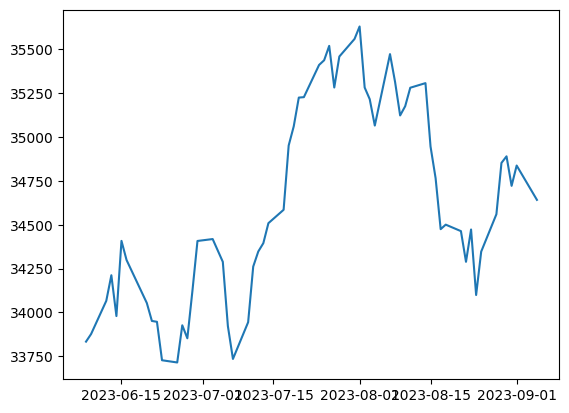

In [28]:
# Drawing Line Plots
# Line Plots with a Single Line
plt.plot(data['Date'], data['Close'])
plt.show()

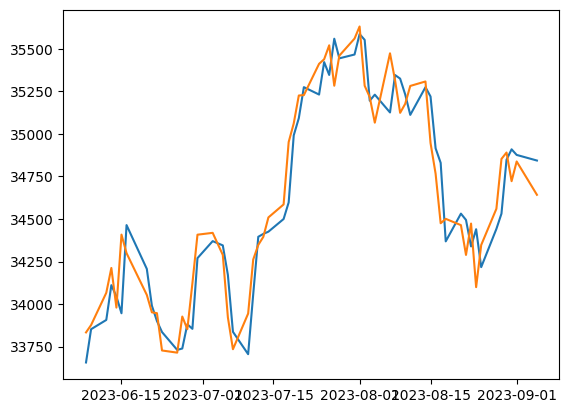

In [29]:
# Line Plots with Multiple Lines
plt.plot(data['Date'], data['Open'])
plt.plot(data['Date'], data['Close'])
plt.show()

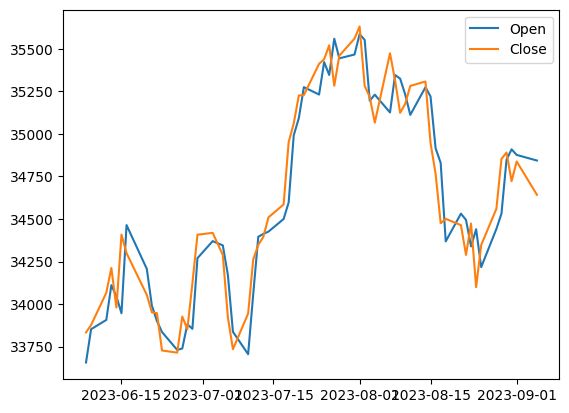

In [30]:
# Adding a Legend
plt.plot(data['Date'], data['Open'], label = 'Open')
plt.plot(data['Date'], data['Close'], label = 'Close')
plt.legend()
plt.show()

In [33]:
# Drawing Bar Plots
# Import the calendar package 
from calendar import month_name

# Order by months by chronological order
data['Month'] = pd.Categorical(data['Date'].dt.month_name(), month_name[1:])

# Group metrics by monthly averages
monthly = data.groupby('Month').mean().reset_index()

monthly.head(12)

/tmp/ipykernel_6764/2992440148.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = data.groupby('Month').mean().reset_index()


,Month,Date,Open,High,Low,Close
0,January,NaT,NaN,NaN,NaN,NaN
1,February,NaT,NaN,NaN,NaN,NaN
2,March,NaT,NaN,NaN,NaN,NaN
3,April,NaT,NaN,NaN,NaN,NaN
4,May,NaT,NaN,NaN,NaN,NaN
5,June,2023-06-19 13:30:00,33961.940000,34120.254375,33868.00125,34023.688125
6,July,2023-07-16 20:24:00,34731.967500,34898.006000,34646.13550,34777.200000
7,August,2023-08-16 00:00:00,34915.545652,35076.850870,34750.49913,34880.656957
8,September,2023-09-03 00:00:00,34859.730000,34925.220000,34678.16500,34739.840000
9,October,NaT,NaN,NaN,NaN,NaN


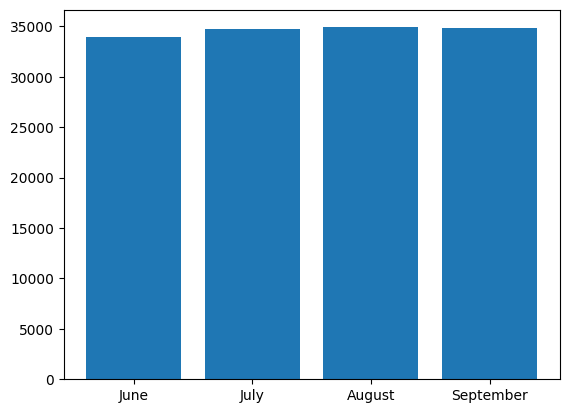

In [39]:
# Vertical Bar Plots
plt.bar(monthly['Month'], height = monthly['Open'])
plt.show()

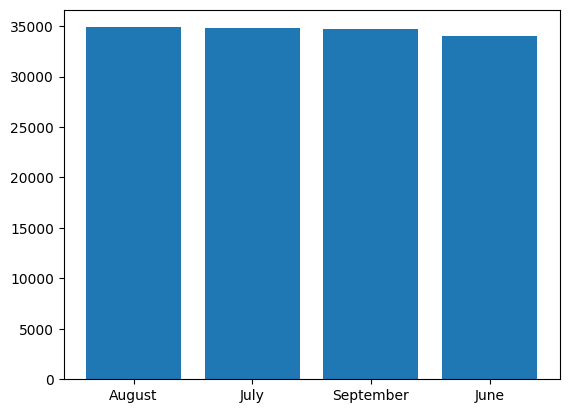

In [40]:
# Reordering Bars in Bar Plots
monthly_srtd = monthly.sort_values(by = 'Close', ascending = False)

plt.bar(monthly_srtd['Month'], height = monthly_srtd['Close'])
plt.show()

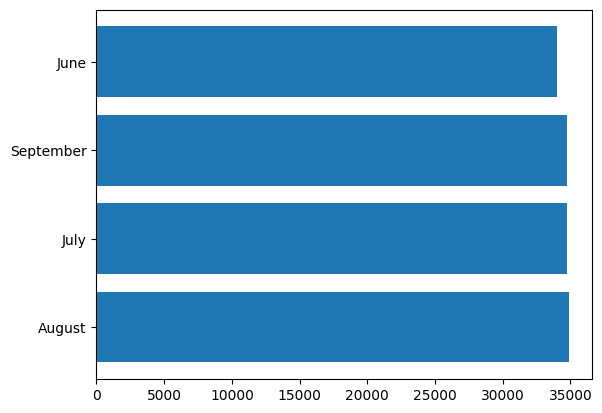

In [42]:
# Horizontal Bar Plots
plt.barh(monthly_srtd['Month'], width = monthly_srtd['Close'])
plt.show()

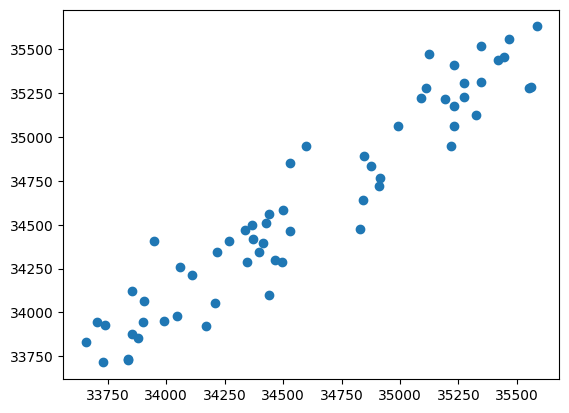

In [43]:
# Drawing Scatter Plots
# Scatter Plots
plt.scatter(data['Open'], data['Close'])
plt.show()

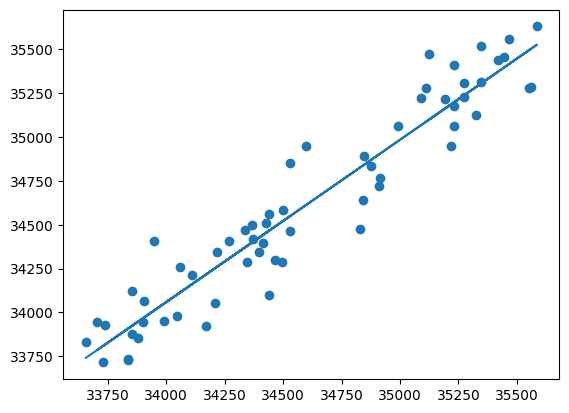

In [44]:
# Scatter Plots with a Trend Line
z = np.polyfit(data['Open'], data['Close'], 1)
p = np.poly1d(z)


plt.scatter(data['Open'], data['Close'])
plt.plot(data['Open'], p(data['Open']))
plt.show()

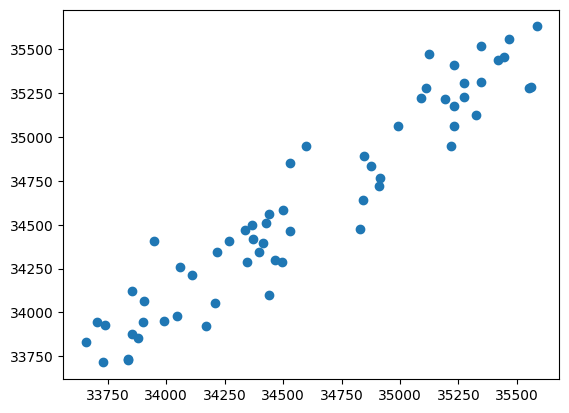

In [45]:
# Setting the Plot Title and Axis Labels
plt.scatter(data['Open'], data['Close'])
plt.show()

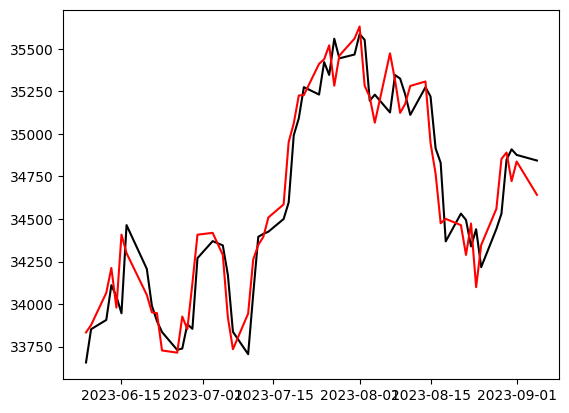

In [46]:
# Changing Colors Lines
plt.plot(data['Date'], data['Open'], color = 'black')
plt.plot(data['Date'], data['Close'], color = 'red')
plt.show()

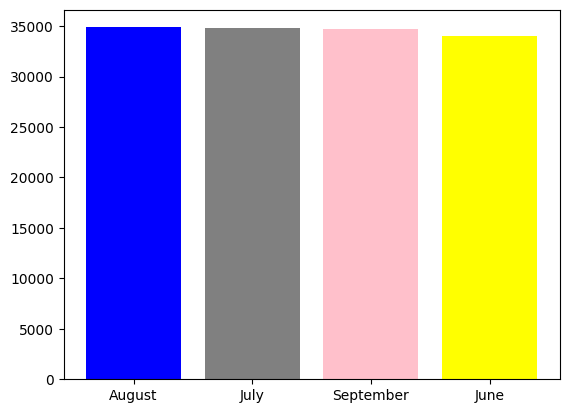

In [50]:
# Changing Colors Bars
plt.bar(monthly_srtd['Month'], height = monthly_srtd['Close'], color = ['blue', 'gray', 'pink', 'yellow', 'red'])
plt.show()

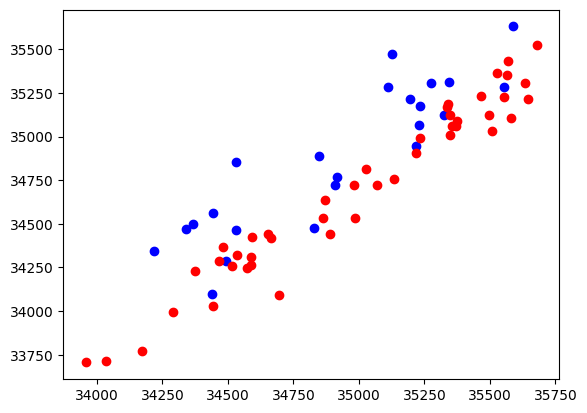

In [62]:
# Changing Colors Points
plt.scatter(data[data['Month'] == 'August']['Open'], data[data['Month'] == 'August']['Close'], color = 'blue')

plt.scatter(data[data['Month'] != 'June']['High'], data[data['Month'] != 'June']['Low'], color = 'red')

plt.show()

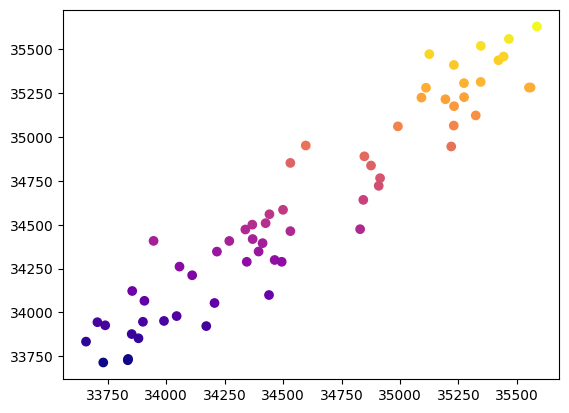

In [63]:
# Using Colormaps
plt.scatter(data['Open'], data['Close'], c=data['Close'], cmap = plt.cm.plasma)

plt.show()

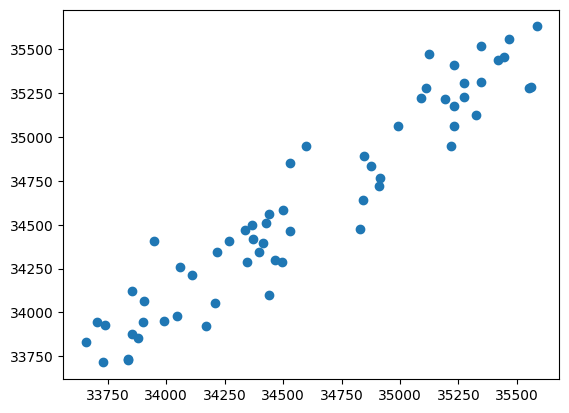

In [64]:
plt.scatter(data['Open'], data['Close'])
plt.savefig('OpenClose.png')